In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # or import seaborn as sns for enhanced visualization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [55]:
#STILL NEEDS TO BE ADJUSTED TO OUR CASE - THIS IS FROM DEE

#importing the data from our shared google drive
import gspread #pip install gspread



!pip install gspread
!pip install oauth2client

from oauth2client.service_account import ServiceAccountCredentials #pip install oauth2client
import pandas as pd

def gsheetimport(path_to_json_key, sheeturl):
    scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]
    credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_json_key, scope)
    gc = gspread.authorize(credentials)
    sh = gc.open_by_url(sheeturl)
    data = sh.worksheet("Sheet1") 
    data = data.get_all_values()
    df = pd.DataFrame(data[1:], columns=data[0])
    return df


# =============================================================================
# Enter your inputs below
# =============================================================================

path_to_json_key = '/Users/maria/Desktop/Uni/LSE programme/employerProject/moonlit-state-404310-6a3b2580f5bd.json' #replace with the path of your credentials
sheeturl = 'https://docs.google.com/spreadsheets/d/1xvI3uHvR1ENUyZS74wO2w2Sle5LAbwmRQE47hn5nT-g/edit#gid=1281354529' #replace with your google sheet url (same sheet that you used to share the email address from the service account)

                 

df = gsheetimport(path_to_json_key, sheeturl)

C:\Users\maria\AppData\Local\Temp\ipykernel_21380\1006304848.py:34: DeprecationWarning: [Deprecated][in version 6.0.0]: client_factory will be replaced by gspread.http_client types
  df = gsheetimport(path_to_json_key, sheeturl)


PermissionError: 

In [ ]:
df.head()

In [3]:
# Load cleaned_central_london.csv into a DataFrame

Central_London = pd.read_csv('cleaned_central_london.csv')
Inner_London = pd.read_csv('cleaned_inner_london.csv')
Outer_London = pd.read_csv('cleaned_outer_london.csv')
Biking_Sites = pd.read_csv('cleaned_bike_sites.csv')



### Inital Hypothesis

Having good availability and distribution of safe and affordable hire bikes in London will increase the numbers of journeys completed by bike

Separating bike lanes from main roads, cars and large vehicles will make cyclists feel safer and thus increase the numbers of journeys completed by bike

More journeys are completed by bike in dry weather than rain

More journeys are completed by bike in the summer months than in the winter months

The time of day has an impact on the number of journeys completed by bike, with a large proportion of journeys completed by bike falling within commuter hours

More journeys are completed by bike in central London than outer London as journeys are typically shorter

Residents of ‘deprived’ areas of London complete fewer journeys on bike than those in ‘wealthy’ areas

---> which regions are deprived and which are wealthy?


### Concrete steps

First London:
Within one region per year and quarter --> total number of bikers

Within one region per year and quarter --> total number of bikers per time of the day

Within one region per year and quarter --> total number of bikers per weather


Then NYC and Sydney




### Notes to myself


1. descriptive analysis for each data set 

Central_London, Inner_London, Outer_London, Bike_Sites, NY, Sydney ... ? 


2. complete some of the exploratory analysis, by plotting number of journeys against weather, time of day, time of year (season/financial quarter) and any other basic plots that allow us to start explaining what factors effect whether people cycle. 


!!! we can't compare total cycles for the metrics above as there is likely to have been a different number of surveys done for each time/place/region etc. 

I will leave you to choose the best way to normalise it, but as each survey was always completed over a 15 minute timescale I would suggest looking at average number of cyclists in a 15 minute period.


### Central London

In [4]:
# Show first few rows --> get a feeling for the data
Central_London.head(10)


# drop columns equivalent financial qarter? number of private and hire bikes? does direction matter?
# drop Location --> as we have central london as the overarching location defined
# just a new df for my version --> CentralLondonReduced


# plotting private vs hires --> if positivly correlated --> total 




,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey_date,Survey_weekday,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0600 - 0615,Early Morning,Northbound,06:00,0,0,0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0615 - 0630,Early Morning,Northbound,06:15,15,0,15
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0630 - 0645,Early Morning,Northbound,06:30,35,0,35
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0645 - 0700,Early Morning,Northbound,06:45,59,2,61
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0700 - 0715,AM peak,Northbound,07:00,73,0,73
5,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0715 - 0730,AM peak,Northbound,07:15,89,2,91
6,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0730 - 0745,AM peak,Northbound,07:30,151,3,154
7,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0745 - 0800,AM peak,Northbound,07:45,173,2,175
8,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0800 - 0815,AM peak,Northbound,08:00,274,1,275
9,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),24/01/14,Friday,Dry,0815 - 0830,AM peak,Northbound,08:15,248,4,252


In [5]:
# Check data types of each column
Central_London.dtypes



Survey wave (calendar quarter)    object
Equivalent financial quarter      object
Site ID                           object
Location                          object
Survey_date                       object
Survey_weekday                    object
Weather                           object
Time                              object
Period                            object
Direction                         object
Start time                        object
Number of private cycles           int64
Number of cycle hire bikes         int64
Total cycles                       int64
dtype: object

In [6]:
#types of Survey_date need to be properly formated - and we skip the unknowns ones with errors=...

Central_London['Survey_date'] = pd.to_datetime(Central_London['Survey_date'], format='%d/%m/%y', errors='coerce')



In [7]:
# Check data types of each column
Central_London.dtypes

Survey wave (calendar quarter)            object
Equivalent financial quarter              object
Site ID                                   object
Location                                  object
Survey_date                       datetime64[ns]
Survey_weekday                            object
Weather                                   object
Time                                      object
Period                                    object
Direction                                 object
Start time                                object
Number of private cycles                   int64
Number of cycle hire bikes                 int64
Total cycles                               int64
dtype: object

In [8]:
#drop the columns:
columns_to_drop = ['Direction', 'Equivalent financial quarter', 'Site ID']

#reduced DataFrame by dropping the specified columns
CentralLondonReduced = Central_London.drop(columns=columns_to_drop)

In [9]:
# Explore the data.
Central_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758163 entries, 0 to 758162
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  758163 non-null  object        
 1   Equivalent financial quarter    758163 non-null  object        
 2   Site ID                         758163 non-null  object        
 3   Location                        758163 non-null  object        
 4   Survey_date                     747751 non-null  datetime64[ns]
 5   Survey_weekday                  758163 non-null  object        
 6   Weather                         758163 non-null  object        
 7   Time                            758163 non-null  object        
 8   Period                          758163 non-null  object        
 9   Direction                       758163 non-null  object        
 10  Start time                      758163 non-null  object 

In [10]:
# Check for missing values
Central_London.isnull().sum()


#we have distributed some dates that were noted down as unknown (between 2014-2020)
#get rid of the missings ones

Survey wave (calendar quarter)        0
Equivalent financial quarter          0
Site ID                               0
Location                              0
Survey_date                       10412
Survey_weekday                        0
Weather                               0
Time                                  0
Period                                0
Direction                             0
Start time                            0
Number of private cycles              0
Number of cycle hire bikes            0
Total cycles                          0
dtype: int64

In [11]:


# Generate a summary of descriptive statistics
Central_London.describe()

,Number of private cycles,Number of cycle hire bikes,Total cycles
count,758163.000000,758163.000000,758163.000000
mean,14.823122,1.829918,16.653040
std,26.255103,3.321462,28.675116
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,7.000000,1.000000,8.000000
75%,16.000000,2.000000,18.000000
max,1177.000000,108.000000,1200.000000


In [12]:
# Understanding how many survey waves there were
unique_survey_waves = Central_London['Survey wave (calendar quarter)'].nunique()

print("Total number of unique survey waves:", unique_survey_waves)

Total number of unique survey waves: 31


In [13]:
unique_survey_wave_values = Central_London['Survey wave (calendar quarter)'].unique()

print("Unique survey wave values:")
for value in unique_survey_wave_values:
    print(value)
    
    #why is Q3 2021 double noted down? 
    #2020 has two missing quarters --> which is a pity as Corona broke out in that year 


Unique survey wave values:
2014 Q1 (January-March)
2014 Q2 (April-June)
2014 Q3 (July-September)
2014 Q4 (October-December)
2015 Q1 (January-March)
2015 Q2 (April-June)
2015 Q3 (July-September)
2015 Q4 (October-December)
2016 Q1 (January-March)
2016 Q2 (April-June)
2016 Q3 (July-September)
2016 Q4 (October-December)
2017 Q1 (January-March)
2017 Q2 (April-June)
2017 Q3 (July-September)
2017 Q4 (October-December)
2018 Q1 (January-March)
2018 Q2 (April-June)
2018 Q3 (July-September)
2018 Q4 (October-December)
2019 Q1 (January-March)
2019 Q2 (April-June)
2019 Q3 (July-September)
2019 Q4 (October-December)
2020 Q1 (January-March)
2020 Q3 (July-September)
2021 Q2 (April-June)
2021 Q2 (April-June) 
2021 Q3 (July-September)
2021 Q3 (July-September) 
2021 Q4 (October-December) 


In [14]:
# Descriptive analysis for Survey wave
survey_wave_counts = Central_London['Survey wave (calendar quarter)'].value_counts()
print(survey_wave_counts)

#2021 Q2 and 2021 Q3 twice noted --> but in totla would have around 24k data points
#2021 Q1 is missing
#enough data points per quarter I would say and not too much differences in the total number of data points
#just watch out if something is summed up! forming averages should be fine


2020 Q3 (July-September)       26880
2020 Q1 (January-March)        26880
2019 Q2 (April-June)           26880
2019 Q1 (January-March)        26880
2018 Q4 (October-December)     26880
2018 Q3 (July-September)       26880
2018 Q2 (April-June)           26880
2017 Q4 (October-December)     26752
2017 Q3 (July-September)       26752
2019 Q4 (October-December)     26752
2019 Q3 (July-September)       26752
2021 Q4 (October-December)     26624
2021 Q3 (July-September)       26584
2017 Q1 (January-March)        25728
2015 Q4 (October-December)     25728
2014 Q3 (July-September)       25728
2014 Q4 (October-December)     25728
2015 Q1 (January-March)        25728
2015 Q2 (April-June)           25728
2017 Q2 (April-June)           25728
2015 Q3 (July-September)       25728
2016 Q2 (April-June)           25728
2018 Q1 (January-March)        25728
2014 Q2 (April-June)           25728
2016 Q4 (October-December)     25728
2016 Q1 (January-March)        25600
2016 Q3 (July-September)       25600
2

In [15]:
financial_quarter_counts = Central_London['Equivalent financial quarter'].value_counts()
print (financial_quarter_counts)


2020-21 Q2    26880
2019-20 Q4    26880
2019-20 Q1    26880
2018-19 Q4    26880
2018-19 Q3    26880
2018-19 Q2    26880
2018-19 Q1    26880
2017-18 Q2    26752
2017-18 Q3    26752
2019-20 Q3    26752
2019-20 Q2    26752
2021-22 Q2    26712
2021-22 Q3    26624
2017-18 Q1    25728
2014-15 Q1    25728
2016-17 Q4    25728
2017-18 Q4    25728
2016-17 Q3    25728
2016-17 Q1    25728
2015-16 Q3    25728
2015-16 Q2    25728
2015-16 Q1    25728
2014-15 Q4    25728
2014-15 Q3    25728
2014-15 Q2    25728
2016-17 Q2    25600
2015-16 Q4    25600
2013-14 Q4    25408
2021-22 Q1    24315
Name: Equivalent financial quarter, dtype: int64


In [16]:
# Understanding the directions
direction_count = Central_London['Direction'].nunique()

print("Total number of Directions:", direction_count)

unique_direction_count = Central_London['Direction'].unique()

print("Unique Directions:")
for value in unique_direction_count:
    print(value)



Total number of Directions: 4
Unique Directions:
Northbound
Southbound
Eastbound
Westbound


In [17]:
# Understanding the locations
location_count = Central_London['Location'].nunique()

print("Total number of Locations:", location_count)

unique_location_count = Central_London['Location'].unique()

print("Unique Locations:")
for value in unique_location_count:
    print(value)

Total number of Locations: 205
Unique Locations:
Millbank (south of Thorney Street)
Bishopsgate
Southwark Bridge
Southwark Bridge Road
Tooley Street
Southwark Bridge Road (north - between Flat Iron Square and America Street)
Albert Embankment (south of Salamanca Street)
Strand
Charing Cross Road
Lambeth Palace Road
Whitehall (south of Horse Guards Avenue)
Westminster Bridge
Victoria Embankment (by Cleopatra's Needle)
Victoria Embankment (between Derby Gate and Westminster Bridge)
Millbank (north of Great Peter Street)
Lambeth Bridge
Waterloo Bridge
Victoria Street
Bridge Street
Pall Mall
Buckingham Palace Road
Northumberland Avenue
Kennington Road (north)
Lambeth Road
Kennington Road (south of Brook Drive)
Westminster Bridge Road
Waterloo Road
Blackfriars Road (Southwark station)
Temple
Blackfriars Bridge
London Bridge
Borough High Street
Bermondsey Street
London Road
Southwark Street
Lambeth Road (west of St. George's Road)
Borough Road
Minories
Gracechurch Street
Blackfriars Road
New

In [18]:
# Understanding the Weather descriptions
Weather_count = Central_London['Weather'].nunique()

print("Total number of Weather conditions:", Weather_count)

unique_Weather_count = Central_London['Weather'].unique()

print("Unique Weather conditions:")
for value in unique_Weather_count:
    print(value)
    
    
#ok the surveys were not consistent in the labeling of the weather conditions --> makes it hard to use this variable

Total number of Weather conditions: 284
Unique Weather conditions:
Dry
Wet
Rain
Fine
Damp
Showery
Cold/rain
Light Rain
Slightly Wet
Rain Stopped
Road Wet
Almost Dry
Light Shower
Rain Damp
Rain Dry
Wet Damp
Very Wet
V Wet
Wet - Dry
Dry - Wet
Dry - Rain
Damp - Rain
Wet/ Dry
S. Wet
V. Wet
Wet Intermittently
Cloudy/ Rain
Windy/ Rain
Cold/ Rain
Drizzle
Lt Rain
Dry & Sunny
Spitting
Showers
unknown
Cloudy
Sunny
Light Showers
Hazy
Shower
Foggy
Dull
Wet/dry
Kdry
Partly Cloudy
Rainy
Wet T
Sun
Fair
Slight Drizzle
Very Heavy Rain
Mild
Wet + Windy
Blustery
Rain/wind
Fine Windy
Dry Windy
Dry Wet Road
Deluge
Dry/wet
Dry & Wet
V Light Rain
Dry A.m Wet P.m
Wet Road
Cold
Cloudy/rain
Wet & Windy
Windy
Down Pour
Dry & Very Windy
Mist
Cold Windy Dry
Drty
Dry (windy)
Wet (windy)
Fine (windy)
Road Drying Sun Out
Dryish
Wetish
Light Shrs
Dry & Windy
Some Showers
Rains
Dry/sunny
Dry/cloudy
Dry/hot
Sunny/rainy
Very Hot Dry
Sunny Cloudy
Dry Dark
Dark Sunny
Dark Dry
Dark
Fine Drizzle
Heavy Showers
D
Wetr
Showers 

In [19]:
# Count the frequency of each unique value in the "Time" column
time_counts = Central_London['Time'].value_counts()

# Display the total number of unique values in the "Time" column
total_unique_time = len(time_counts)
print("Total number of unique Times:", total_unique_time)

# Display the counts for each unique value in the "Time" column
print("Counts for each unique Times:")
for time, count in time_counts.items():
    print(f"{time}: {count}")
    
    

Total number of unique Times: 64
Counts for each unique Times:
0600 - 0615: 11848
1230 - 1245: 11848
1100 - 1115: 11848
1115 - 1130: 11848
1130 - 1145: 11848
1145 - 1200: 11848
1200 - 1215: 11848
1215 - 1230: 11848
1245 - 1300: 11848
1030 - 1045: 11848
1300 - 1315: 11848
1315 - 1330: 11848
1330 - 1345: 11848
1345 - 1400: 11848
0615 - 0630: 11848
1530 - 1545: 11848
1045 - 1100: 11848
1400 - 1415: 11848
1015 - 1030: 11848
0800 - 0815: 11848
1000 - 1015: 11848
0645 - 0700: 11848
0700 - 0715: 11848
0715 - 0730: 11848
0730 - 0745: 11848
0630 - 0645: 11848
0745 - 0800: 11848
0815 - 0830: 11848
0830 - 0845: 11848
0845 - 0900: 11848
0900 - 0915: 11848
0915 - 0930: 11848
0930 - 0945: 11848
0945 - 1000: 11848
1645 - 1700: 11847
1630 - 1645: 11847
1600 - 1615: 11847
1545 - 1600: 11847
1615 - 1630: 11847
1515 - 1530: 11847
1445 - 1500: 11847
1430 - 1445: 11847
1415 - 1430: 11847
1500 - 1515: 11847
1800 - 1815: 11844
1930 - 1945: 11843
2130 - 2145: 11843
2115 - 2130: 11843
2100 - 2115: 11843
2045 -

In [20]:
# Count the frequency of each unique value in the "Period" column
period_counts = Central_London['Period'].value_counts()

# Display the total number of unique values in the "Period" column
total_unique_periods = len(period_counts)
print("Total number of unique Periods:", total_unique_periods)

# Display the counts for each unique value in the "Period" column
print("Counts for each unique Period:")
for period, count in period_counts.items():
    print(f"{period}: {count}")
    
    
# the 5 periods are not the same hours long 
# how were the periods defined?

#Early Morning: 6:00-7:00
#AM peak:7:00-10:00
#Inter-peak:10:00-16:00
#PM-peak:16:00-19:00
#Evening:19:00-22:00

Total number of unique Periods: 5
Counts for each unique Period:
Inter-peak: 284346
AM peak: 142176
PM peak: 142133
Evening: 142116
Early Morning: 47392


In [21]:
# Count the frequency of each unique value in the "Survey_date" column
Survey_date_counts = Central_London['Survey_date'].value_counts()

# Display the total number of unique values in the "Survey_date" column
total_unique_Survey_date = len(Survey_date_counts)
print("Total number of unique Survey_dates:", total_unique_Survey_date)

# Display the counts for each unique value in the "Survey_date" column
print("Counts for each unique Survey_date:")
for Survey_date, count in Survey_date_counts.items():
    print(f"{Survey_date}: {count}")

Total number of unique Survey_dates: 1596
Counts for each unique Survey_date:
2014-01-30 00:00:00: 2690
2014-02-03 00:00:00: 2330
2014-01-31 00:00:00: 2207
2014-01-29 00:00:00: 2185
2014-01-28 00:00:00: 1874
2014-01-27 00:00:00: 1610
2014-01-23 00:00:00: 1600
2014-02-04 00:00:00: 1456
2014-01-24 00:00:00: 1442
2018-01-29 00:00:00: 1346
2019-04-01 00:00:00: 1332
2018-04-17 00:00:00: 1316
2014-04-25 00:00:00: 1296
2020-02-12 00:00:00: 1296
2014-02-07 00:00:00: 1262
2019-09-10 00:00:00: 1240
2015-01-07 00:00:00: 1220
2019-04-02 00:00:00: 1188
2020-07-07 00:00:00: 1175
2016-11-30 00:00:00: 1166
2014-12-17 00:00:00: 1164
2014-05-22 00:00:00: 1158
2015-01-08 00:00:00: 1140
2017-01-25 00:00:00: 1138
2020-03-03 00:00:00: 1118
2014-02-10 00:00:00: 1108
2018-03-05 00:00:00: 1102
2018-04-18 00:00:00: 1098
2020-08-11 00:00:00: 1090
2018-04-19 00:00:00: 1090
2014-05-19 00:00:00: 1088
2016-03-21 00:00:00: 1084
2018-11-06 00:00:00: 1080
2021-12-13 00:00:00: 1080
2017-07-12 00:00:00: 1078
2015-05-06 0

In [22]:
# Count the frequency of each unique value in the "Survey_weekday" column
Survey_weekday_counts = Central_London['Survey_weekday'].value_counts()

# Display the total number of unique values in the "Survey_weekday" column
total_unique_Survey_weekday = len(Survey_weekday_counts)
print("Total number of unique Survey_weekday:", total_unique_Survey_weekday)

# Display the counts for each unique value in the "Survey_weekday" column
print("Counts for each unique Survey_weekday:")
for Survey_weekday, count in Survey_weekday_counts.items():
    print(f"{Survey_weekday}: {count}")
    
#Most data collected on Monday, least on Saturday and Sunday
# also unknowns ones


Total number of unique Survey_weekday: 8
Counts for each unique Survey_weekday:
Monday: 168837
Tuesday: 161584
Wednesday: 155395
Thursday: 137762
Friday: 123713
Unknown: 10412
Saturday: 334
Sunday: 126


In [23]:
CentralLondonReduced.head()

,Survey wave (calendar quarter),Location,Survey_date,Survey_weekday,Weather,Time,Period,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0600 - 0615,Early Morning,06:00,0,0,0
1,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0615 - 0630,Early Morning,06:15,15,0,15
2,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0630 - 0645,Early Morning,06:30,35,0,35
3,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0645 - 0700,Early Morning,06:45,59,2,61
4,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0700 - 0715,AM peak,07:00,73,0,73


In [24]:
import pandas as pd

# Assuming CentralLondonReduced is your existing DataFrame and it has a column named 'SurveyWave'
# This regular expression will match any year followed by ' Q' and then a number from 1 to 4
CentralLondonReduced['YearQuarter'] = CentralLondonReduced['Survey wave (calendar quarter)'].str.extract(r'(\d{4} Q[1-4])')

# Now 'YearQuarter' contains just the year and quarter like '2014 Q1', '2014 Q2', ..., '2023 Q1', etc.
CentralLondonReduced.head()




,Survey wave (calendar quarter),Location,Survey_date,Survey_weekday,Weather,Time,Period,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles,YearQuarter
0,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0600 - 0615,Early Morning,06:00,0,0,0,2014 Q1
1,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0615 - 0630,Early Morning,06:15,15,0,15,2014 Q1
2,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0630 - 0645,Early Morning,06:30,35,0,35,2014 Q1
3,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0645 - 0700,Early Morning,06:45,59,2,61,2014 Q1
4,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Friday,Dry,0700 - 0715,AM peak,07:00,73,0,73,2014 Q1


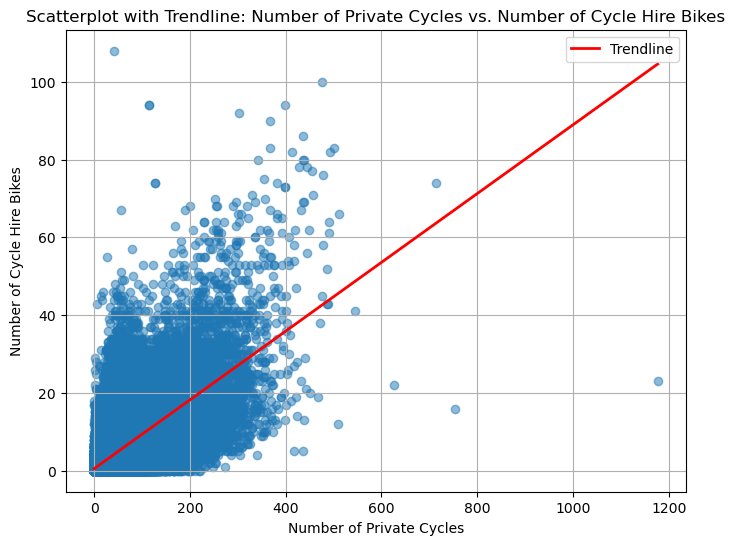

In [25]:
# plotting private vs hires --> if positivly correlated --> we can focus on total 

import matplotlib.pyplot as plt
import numpy as np

# Extract the columns for the scatterplot
x = CentralLondonReduced['Number of private cycles']
y = CentralLondonReduced['Number of cycle hire bikes']

# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # alpha controls the transparency of points
plt.xlabel('Number of Private Cycles')
plt.ylabel('Number of Cycle Hire Bikes')
plt.title('Scatterplot with Trendline: Number of Private Cycles vs. Number of Cycle Hire Bikes')
plt.grid(True)

# Calculate the trendline (linear regression)
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x), 100)
y_fit = trendline(x_fit)

# Plot the trendline
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Trendline')

# Display the legend
plt.legend()

plt.show()


#indeed positively correlated (see also calculation)--> we can focus on the total amounts 



In [26]:
#calculating exact numbers
correlation_matrix = CentralLondonReduced[['Number of private cycles', 'Number of cycle hire bikes']].corr()

# Extract the correlation coefficient between the two variables
correlation_coefficient = correlation_matrix.iloc[0, 1]

print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.6989234731467473


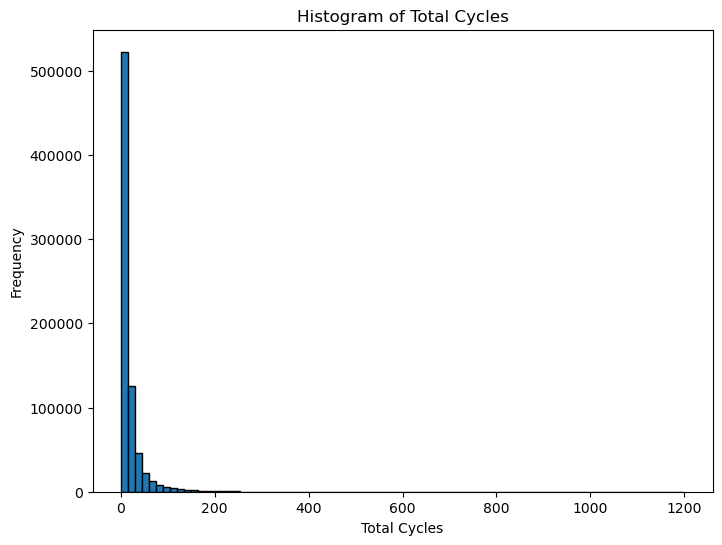

In [27]:
import matplotlib.pyplot as plt

#Visualize the distribution of the "Total cycles" column using a histogram 


plt.figure(figsize=(8, 6))
plt.hist(CentralLondonReduced['Total cycles'], bins=80, edgecolor='k')
plt.xlabel('Total Cycles')
plt.ylabel('Frequency')
plt.title('Histogram of Total Cycles')
plt.show()


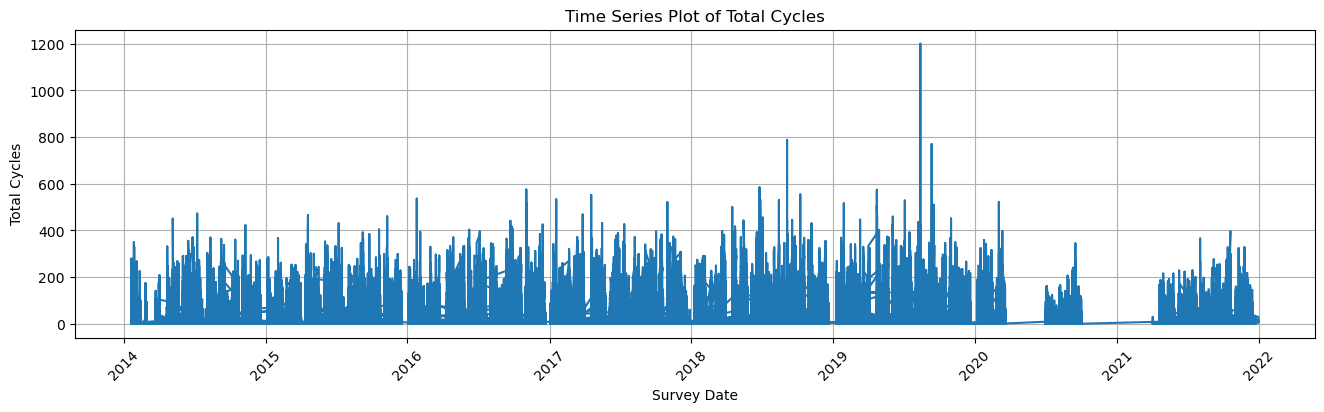

In [28]:
#Create a time series plot to visualize how "Total cycles" vary over time.

plt.figure(figsize=(16, 4))
plt.plot(CentralLondonReduced['Survey_date'], CentralLondonReduced['Total cycles'])
plt.xlabel('Survey Date')
plt.ylabel('Total Cycles')
plt.title('Time Series Plot of Total Cycles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#needs to be smoothed more 


In [29]:
import seaborn as sns

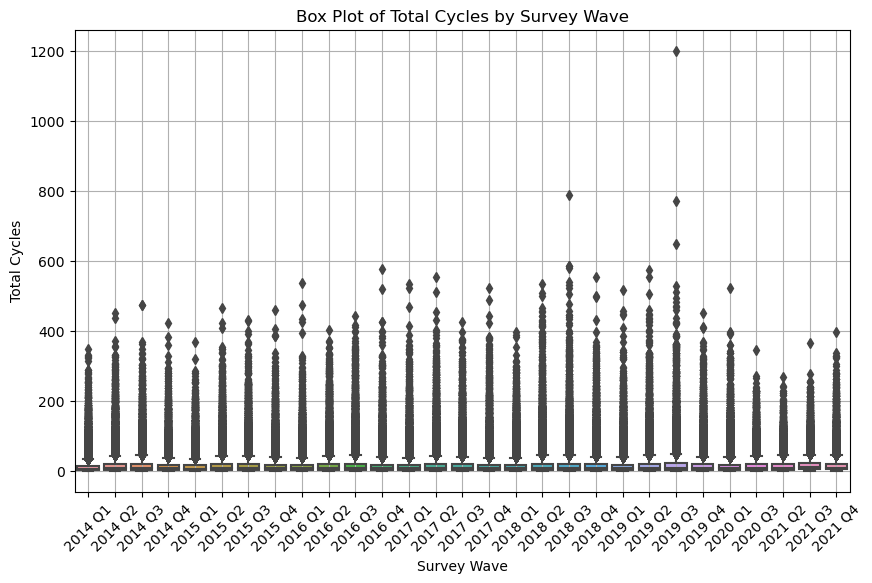

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearQuarter', y='Total cycles', data=CentralLondonReduced)
plt.xlabel('Survey Wave')
plt.ylabel('Total Cycles')
plt.title('Box Plot of Total Cycles by Survey Wave')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#Use a box plot to visualize the distribution of "Total cycles" for each survey wave.

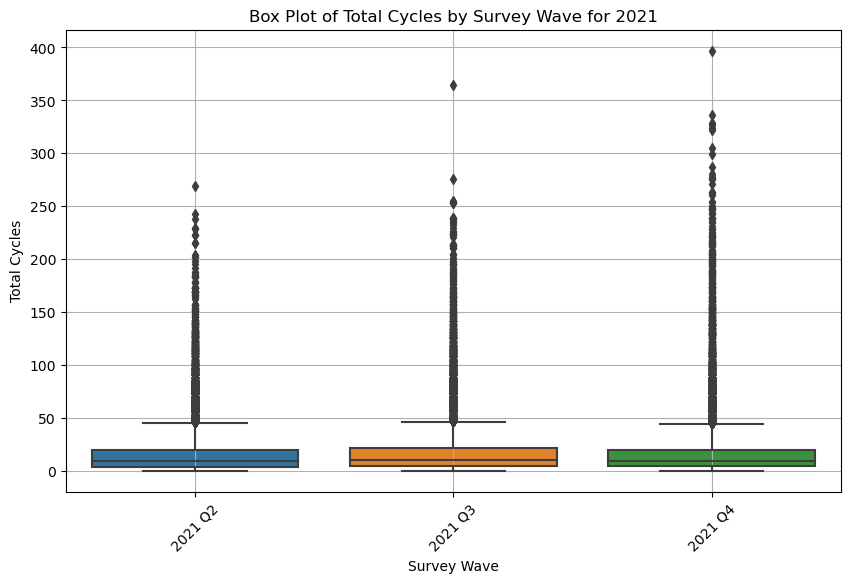

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows for the year 2021.
data_2021 = CentralLondonReduced[CentralLondonReduced['YearQuarter'].str.contains('2021')]

# Plotting the boxplot for the year 2021.
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearQuarter', y='Total cycles', data=data_2021)
plt.xlabel('Survey Wave')
plt.ylabel('Total Cycles')
plt.title('Box Plot of Total Cycles by Survey Wave for 2021')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# cycles throughout the day 
# to tackle the outliers 


### Outer London

In [32]:
# Print first few rows --> get a feeling for the data
Outer_London.head(10)



,Survey wave (year),Site ID,Location,Weather,Time,Period,Direction,Start time,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning,Northbound,06:00,2,1,0,3
1,2015,OUTCY001,High Road Leyton,Dry,0615 - 0630,Early Morning,Northbound,06:15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,Dry,0630 - 0645,Early Morning,Northbound,06:30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,Dry,0645 - 0700,Early Morning,Northbound,06:45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,Dry,0700 - 0715,AM peak,Northbound,07:00,4,1,0,5
5,2015,OUTCY001,High Road Leyton,Dry,0715 - 0730,AM peak,Northbound,07:15,2,1,0,3
6,2015,OUTCY001,High Road Leyton,Dry,0730 - 0745,AM peak,Northbound,07:30,7,0,0,7
7,2015,OUTCY001,High Road Leyton,Dry,0745 - 0800,AM peak,Northbound,07:45,2,0,0,2
8,2015,OUTCY001,High Road Leyton,Dry,0800 - 0815,AM peak,Northbound,08:00,3,2,0,5
9,2015,OUTCY001,High Road Leyton,Dry,0815 - 0830,AM peak,Northbound,08:15,1,1,0,2


In [33]:
# Generate a summary of descriptive statistics
Outer_London.describe()

#data goes from 2015-2021

,Survey wave (year),Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
count,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000
mean,2017.848267,1.335207,0.240646,0.013837,1.589695
std,1.993641,2.701113,0.751606,0.157072,3.165160
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,2.000000,0.000000,0.000000,2.000000
max,2021.000000,62.000000,19.000000,13.000000,78.000000


In [40]:

# in general more men on bikes

# more males --> safety ? looking into crimes. or lights - its too dark and feels unsafe 
# --> if it is because of light (day or night) 
#--> we could look into the differences in ratios for the different periods of the day 
# if the ratio women and men is way lower than the other ratios it could point out to the 
#face that women feel unsafer in the darker hours 



# LOOKING INTO THE DIFFERENT YEARS< QUARTERS

# DUTCH DATA --> GENDERS 

# TIEING IT BAKC TO THE CLIENT --> RECOMMENDATION


In [36]:
#check if the ratios significantly differ (ISSUE here: we have too few 'ratios')
# --> aggregate those for the quarters --> run analysis on those 


# we could perhaps look into different times of the year and see if the ratio changes ?
#in Winter it is in general more dark than in Summer --> see if there are differences

#Early Morning: 6:00-7:00
#AM peak:7:00-10:00
#Inter-peak:10:00-16:00
#PM-peak:16:00-19:00
#Evening:19:00-22:00




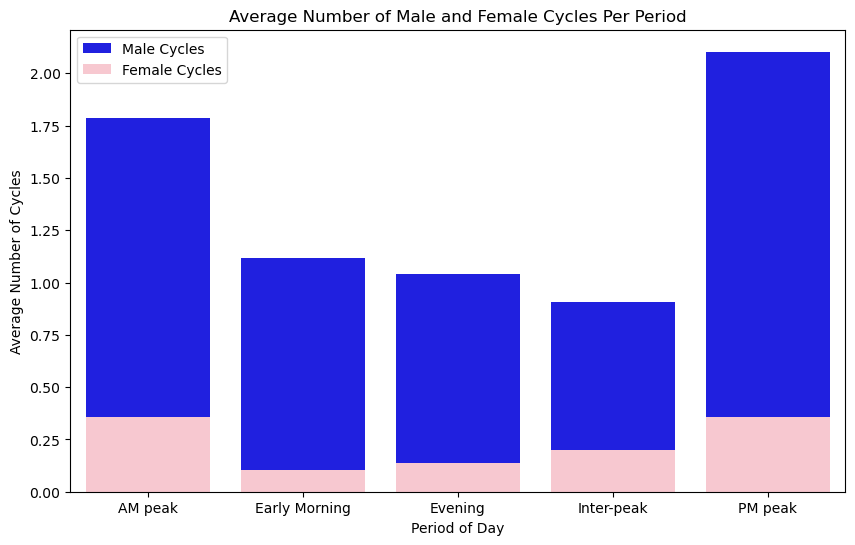

In [38]:
# LOOKING AT AVERAGES! 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


period_totals = Outer_London.groupby('Period')[['Number of male cycles', 'Number of female cycles']].mean().reset_index()

# Create a barplot to visualize the total counts for each period.
plt.figure(figsize=(10, 6))

# We plot the 'Number of male cycles' and 'Number of female cycles' next to each other for each period.
sns.barplot(data=period_totals, x='Period', y='Number of male cycles', color='blue', label='Male Cycles')
sns.barplot(data=period_totals, x='Period', y='Number of female cycles', color='pink', label='Female Cycles')

# Customize the plot with labels, title, and legend.
plt.xlabel('Period of Day')
plt.ylabel('Average Number of Cycles')
plt.title('Average Number of Male and Female Cycles Per Period')
plt.legend()
plt.show()

In [39]:
#check if ratios differ a lot

import pandas as pd

# First, group by 'Period' and sum up the 'Number of male cycles' and 'Number of female cycles'.
period_means = Outer_London.groupby('Period')[['Number of male cycles', 'Number of female cycles']].mean()

# Now calculate the ratio of male to female cycles per period.
# To avoid division by zero, we use .replace(0, 1) which replaces any potential 0 values with 1.
# This prevents a division by zero error but does distort the ratio in cases where there are zero female cycles.
# You might want to handle this case differently depending on your specific requirements.
period_means['Male to Female Ratio'] = period_means['Number of male cycles'].div(period_means['Number of female cycles'].replace(0, 1))

# Reset the index to flatten the DataFrame so 'Period' is a column rather than an index.
period_means.reset_index(inplace=True)

# Display the DataFrame
period_means

,Period,Number of male cycles,Number of female cycles,Male to Female Ratio
0,AM peak,1.787976,0.357169,5.005962
1,Early Morning,1.115758,0.101491,10.993705
2,Evening,1.040713,0.137674,7.559257
3,Inter-peak,0.908568,0.197934,4.590246
4,PM peak,2.103279,0.358873,5.860794


In [60]:
# Check data types of each column
Outer_London.dtypes




Survey wave (year)           int64
Site ID                     object
Location                    object
Weather                     object
Time                        object
Period                      object
Direction                   object
Start time                  object
Number of male cycles        int64
Number of female cycles      int64
Number of unknown cycles     int64
Total cycles                 int64
dtype: object

In [61]:
# Explore the data.
Outer_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Weather                   375660 non-null  object
 4   Time                      375660 non-null  object
 5   Period                    375660 non-null  object
 6   Direction                 375660 non-null  object
 7   Start time                375660 non-null  object
 8   Number of male cycles     375660 non-null  int64 
 9   Number of female cycles   375660 non-null  int64 
 10  Number of unknown cycles  375660 non-null  int64 
 11  Total cycles              375660 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 34.4+ MB


In [62]:
# Check for missing values
Outer_London.isnull().sum()


Survey wave (year)          0
Site ID                     0
Location                    0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start time                  0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64

### Inner London

In [14]:
# Print first few rows --> get a feeling for the data
Inner_London.head(10)

#data goes from 2015-2021

,Survey wave (year),Site ID,Location,Survey_weekday,Survey_date,Weather,Time,Period,Direction,Start time,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0600 - 0615,Early Morning,Northbound,06:00,1,0,1
1,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0615 - 0630,Early Morning,Northbound,06:15,2,0,2
2,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0630 - 0645,Early Morning,Northbound,06:30,2,0,2
3,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0645 - 0700,Early Morning,Northbound,06:45,4,0,4
4,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0700 - 0715,AM peak,Northbound,07:00,4,0,4
5,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0715 - 0730,AM peak,Northbound,07:15,9,0,9
6,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0730 - 0745,AM peak,Northbound,07:30,9,0,9
7,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0745 - 0800,AM peak,Northbound,07:45,10,0,10
8,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0800 - 0815,AM peak,Northbound,08:00,10,0,10
9,2015,INNCY001,Grove Road,Wednesday,20/05/15,Dry,0815 - 0830,AM peak,Northbound,08:15,8,0,8


In [25]:
# Generate a summary of descriptive statistics
Inner_London.describe()

,Survey wave (year),Number of private cycles,Number of cycle hire bikes,Total cycles
count,523776.000000,523776.000000,523776.000000,523776.000000
mean,2017.986070,5.929833,0.267943,6.196408
std,2.035381,10.937833,0.944529,11.309639
min,2015.000000,0.000000,0.000000,0.000000
25%,2016.000000,1.000000,0.000000,1.000000
50%,2018.000000,3.000000,0.000000,3.000000
75%,2020.000000,7.000000,0.000000,7.000000
max,2021.000000,278.000000,29.000000,280.000000


In [63]:
# Check data types of each column
Inner_London.dtypes



Survey wave (year)             int64
Site ID                       object
Location                      object
Survey_weekday                object
Survey_date                   object
Weather                       object
Time                          object
Period                        object
Direction                     object
Start time                    object
Number of private cycles       int64
Number of cycle hire bikes     int64
Total cycles                   int64
dtype: object

In [64]:
# Explore the data.
Inner_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523776 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Survey wave (year)          523776 non-null  int64 
 1   Site ID                     523776 non-null  object
 2   Location                    523776 non-null  object
 3   Survey_weekday              523776 non-null  object
 4   Survey_date                 523776 non-null  object
 5   Weather                     523776 non-null  object
 6   Time                        523776 non-null  object
 7   Period                      523776 non-null  object
 8   Direction                   523776 non-null  object
 9   Start time                  523776 non-null  object
 10  Number of private cycles    523776 non-null  int64 
 11  Number of cycle hire bikes  523776 non-null  int64 
 12  Total cycles                523776 non-null  int64 
dtypes: int64(4), object(9)
memory

In [65]:
# Check for missing values --> nothing is missing
Inner_London.isnull().sum()


Survey wave (year)            0
Site ID                       0
Location                      0
Survey_weekday                0
Survey_date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start time                    0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

### Biking Sites

In [15]:
# Print first few rows --> get a feeling for the data
Biking_Sites.head(10)

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central
5,CENCY006,CENCY,Central area cycle surveys,532263.50,180067.71,Southwark Bridge Road (north - between Flat Ir...,Southwark,Central
6,CENCY007,CENCY,Central area cycle surveys,530467.76,178622.08,Albert Embankment (south of Salamanca Street),Lambeth,Central
7,CENCY008,CENCY,Central area cycle surveys,530347.31,180653.54,Strand,Westminster,Central
8,CENCY009,CENCY,Central area cycle surveys,529990.40,180677.24,Charing Cross Road,Westminster,Central
9,CENCY010,CENCY,Central area cycle surveys,530804.02,179489.31,Lambeth Palace Road,Lambeth,Central


In [66]:
# Check data types of each column
Biking_Sites.dtypes



UnqID                       object
ProgID                      object
SurveyDescription           object
Easting                    float64
Northing                   float64
Location                    object
Borough                     object
Functional cycling area     object
dtype: object

In [67]:
# Explore the data.
Biking_Sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UnqID                    2023 non-null   object 
 1   ProgID                   2023 non-null   object 
 2   SurveyDescription        2023 non-null   object 
 3   Easting                  2023 non-null   float64
 4   Northing                 2023 non-null   float64
 5   Location                 2023 non-null   object 
 6   Borough                  2023 non-null   object 
 7   Functional cycling area  2023 non-null   object 
dtypes: float64(2), object(6)
memory usage: 126.6+ KB


In [68]:
# Check for missing values --> nothing is missing
Biking_Sites.isnull().sum()


UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    0
dtype: int64